# Word2Vec Embeddings Clustering

In [ ]:
! pip install --upgrade gensim
! pip install --upgrade scikit-learn
! pip install --upgrade matplotlib

## Elbow Method

Text(0, 0.5, 'Distância para o Próximo Vizinho Mais Próximo')

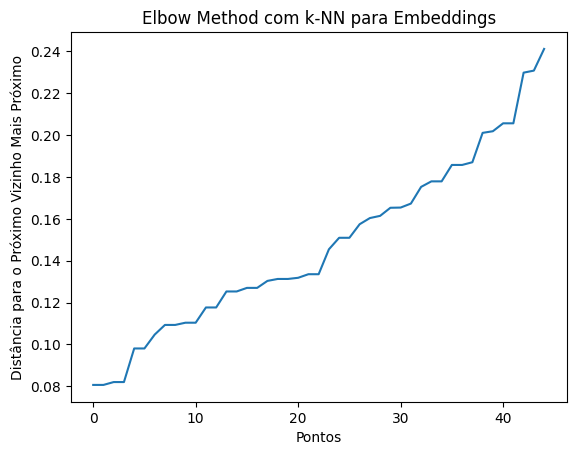

In [35]:
# Importar bibliotecas necessárias
from gensim.models import Word2Vec
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Exemplo simples de frases para criar embeddings
sentences = [
    "O céu está claro hoje, perfeito para observação de estrelas.",
    "A receita de bolo de chocolate é simples e deliciosa.",
    "A inteligência artificial está transformando muitas indústrias.",
    "Os atletas se preparam para a maratona olímpica.",
    "O museu de arte moderna inaugurou uma nova exposição.",
    "Investir em ações requer análise e estratégia.",
    "Os pandas são uma espécie ameaçada encontrada na China.",
    "A fotossíntese é um processo crucial para as plantas.",
    "Shakespeare é um dos maiores escritores da literatura inglesa.",
    "A aprendizagem de máquina é uma fascinante área da computação.",
    "O aquecimento global é um sério desafio ambiental.",
    "A culinária japonesa é conhecida por seu sushi e sashimi.",
    "A Lua é o único satélite natural da Terra.",
    "Jogar xadrez pode melhorar suas habilidades de pensamento estratégico.",
    "A Grande Barreira de Corais é um ecossistema marinho único."
]

# Treinar um modelo Word2Vec
model = Word2Vec(sentences, vector_size=5, window=3, min_count=1, workers=1)

# Extrair embeddings
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])

# Calcular distâncias k-NN
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(word_vectors)
distances, indices = neighbors_fit.kneighbors(word_vectors)

# Ordenar e plotar as distâncias
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Elbow Method com k-NN para Embeddings')
plt.xlabel('Pontos')
plt.ylabel('Distância para o Próximo Vizinho Mais Próximo')


<hr>

## DBSCAN

In [54]:
# Importar bibliotecas necessárias
from gensim.models import Word2Vec
from sklearn.cluster import DBSCAN
import numpy as np

# Conjunto de frases
sentences = [
    ["astronomia", "estrelas", "galáxia"],
    ["música", "melodia", "ritmo"],
    ["computador", "programação", "software"],
    ["literatura", "livros", "autor"],
    ["esporte", "competição", "atleta"],
    ["arte", "pintura", "quadro"],
    ["culinária", "receita", "ingredientes"],
    ["viagem", "turismo", "aventura"],
    ["jardinagem", "plantas", "flores"],
    ["finanças", "investimento", "economia"]
]

# Treinar um modelo Word2Vec
model = Word2Vec(sentences, vector_size=5, window=3, min_count=1, workers=1)

# Extrair embeddings
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])

# Aplicar DBSCAN nos embeddings
dbscan = DBSCAN(eps=0.185, min_samples=2)
clusters = dbscan.fit_predict(word_vectors)

print("Clusters:", clusters)


Clusters: [ 0  1 -1  1  2  1  1  1 -1 -1  3  3 -1  2  3  1  0  3  2  4 -1  1  4  2
  2  2 -1 -1 -1 -1]


In [55]:
model.wv.key_to_index

{'economia': 0,
 'investimento': 1,
 'estrelas': 2,
 'galáxia': 3,
 'música': 4,
 'melodia': 5,
 'ritmo': 6,
 'computador': 7,
 'programação': 8,
 'software': 9,
 'literatura': 10,
 'livros': 11,
 'autor': 12,
 'esporte': 13,
 'competição': 14,
 'atleta': 15,
 'arte': 16,
 'pintura': 17,
 'quadro': 18,
 'culinária': 19,
 'receita': 20,
 'ingredientes': 21,
 'viagem': 22,
 'turismo': 23,
 'aventura': 24,
 'jardinagem': 25,
 'plantas': 26,
 'flores': 27,
 'finanças': 28,
 'astronomia': 29}

In [56]:
# Criar um dicionário para mapear os rótulos dos clusters para as palavras
cluster_map = {}
for word, cluster_id in zip(model.wv.key_to_index, clusters):
    if cluster_id not in cluster_map:
        cluster_map[cluster_id] = []
    cluster_map[cluster_id].append(word)

# Imprimir as palavras em cada cluster
for cluster_id, words in sorted(cluster_map.items()):
    print(f'Cluster {cluster_id}: {words}')

Cluster -1: ['estrelas', 'programação', 'software', 'autor', 'receita', 'plantas', 'flores', 'finanças', 'astronomia']
Cluster 0: ['economia', 'arte']
Cluster 1: ['investimento', 'galáxia', 'melodia', 'ritmo', 'computador', 'atleta', 'ingredientes']
Cluster 2: ['música', 'esporte', 'quadro', 'turismo', 'aventura', 'jardinagem']
Cluster 3: ['literatura', 'livros', 'competição', 'pintura']
Cluster 4: ['culinária', 'viagem']


<hr>

## K-Means

In [34]:
# Importar bibliotecas necessárias
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

# Conjunto de frases
sentences = [
    ["astronomia", "estrelas", "galáxia"],
    ["música", "melodia", "ritmo"],
    ["computador", "programação", "software"],
    ["literatura", "livros", "autor"],
    ["esporte", "competição", "atleta"],
    ["arte", "pintura", "quadro"],
    ["culinária", "receita", "ingredientes"],
    ["viagem", "turismo", "aventura"],
    ["jardinagem", "plantas", "flores"],
    ["finanças", "investimento", "economia"]
]

# Treinar um modelo Word2Vec
model = Word2Vec(sentences, vector_size=10, window=3, min_count=1, workers=10)

# Extrair embeddings
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])

# Definir o número de clusters
k = 5

# Aplicar K-Means nos embeddings
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
clusters = kmeans.fit_predict(word_vectors)

# Criar um dicionário para mapear os rótulos dos clusters para as palavras
cluster_map = {}
for word, cluster_id in zip(model.wv.key_to_index, clusters):
    if cluster_id not in cluster_map:
        cluster_map[cluster_id] = []
    cluster_map[cluster_id].append(word)

# Imprimir as palavras em cada cluster
for cluster_id, words in sorted(cluster_map.items()):
    print(f"Cluster {cluster_id}: {words}")


Cluster 0: ['música', 'melodia', 'arte', 'viagem']
Cluster 1: ['livros', 'autor', 'esporte', 'competição', 'atleta', 'turismo']
Cluster 2: ['economia', 'estrelas', 'literatura', 'pintura', 'ingredientes', 'aventura']
Cluster 3: ['investimento', 'ritmo', 'computador', 'programação', 'culinária', 'receita', 'plantas', 'flores']
Cluster 4: ['galáxia', 'software', 'quadro', 'jardinagem', 'finanças', 'astronomia']


<hr>

## DBSCAN com NLTK

In [5]:
from gensim.models import Word2Vec
from sklearn.cluster import DBSCAN
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Frases para gerar embeddings
sentences = [
    "O céu está claro hoje, perfeito para observação de estrelas.",
    "A receita de bolo de chocolate é simples e deliciosa.",
    "A inteligência artificial está transformando muitas indústrias.",
    "Os atletas se preparam para a maratona olímpica.",
    "O museu de arte moderna inaugurou uma nova exposição.",
    "Investir em ações requer análise e estratégia.",
    "Os pandas são uma espécie ameaçada encontrada na China.",
    "A fotossíntese é um processo crucial para as plantas.",
    "Shakespeare é um dos maiores escritores da literatura inglesa.",
    "A aprendizagem de máquina é uma fascinante área da computação.",
    "O aquecimento global é um sério desafio ambiental.",
    "A culinária japonesa é conhecida por seu sushi e sashimi.",
    "A Lua é o único satélite natural da Terra.",
    "Jogar xadrez pode melhorar suas habilidades de pensamento estratégico.",
    "A Grande Barreira de Corais é um ecossistema marinho único."
]

# Tokenização e remoção de stop words
tokenized_sentences = []
for sentence in sentences:
    words = word_tokenize(sentence.lower())
    words_filtered = [word for word in words if word.isalnum() and word not in stop_words]
    tokenized_sentences.append(words_filtered)

# Treinar um modelo Word2Vec
model = Word2Vec(tokenized_sentences, vector_size=10, window=5, min_count=1, workers=1)

# Extrair embeddings
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])

# Aplicar DBSCAN nos embeddings
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(word_vectors)

# Imprimir os clusters e as palavras associadas
for cluster_id in np.unique(clusters):
    print(f"Cluster {cluster_id}: {[model.wv.index_to_key[i] for i, label in enumerate(clusters) if label == cluster_id]}")


Cluster 0: ['único', 'marinho', 'maratona', 'museu', 'arte', 'moderna', 'inaugurou', 'nova', 'exposição', 'investir', 'ações', 'requer', 'análise', 'estratégia', 'pandas', 'espécie', 'ameaçada', 'encontrada', 'china', 'olímpica', 'preparam', 'processo', 'atletas', 'claro', 'hoje', 'perfeito', 'observação', 'estrelas', 'receita', 'bolo', 'chocolate', 'simples', 'deliciosa', 'inteligência', 'artificial', 'transformando', 'muitas', 'indústrias', 'fotossíntese', 'crucial', 'ecossistema', 'conhecida', 'sashimi', 'lua', 'satélite', 'natural', 'terra', 'jogar', 'xadrez', 'pode', 'melhorar', 'habilidades', 'pensamento', 'estratégico', 'grande', 'barreira', 'corais', 'sushi', 'japonesa', 'plantas', 'culinária', 'shakespeare', 'maiores', 'escritores', 'literatura', 'inglesa', 'aprendizagem', 'máquina', 'fascinante', 'área', 'computação', 'aquecimento', 'global', 'sério', 'desafio', 'ambiental', 'céu']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msanto22\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msanto22\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<hr>

## K-Means com NLTK

In [12]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Frases para gerar embeddings
sentences = [
    "O céu está claro hoje, perfeito para observação de estrelas.",
    "A receita de bolo de chocolate é simples e deliciosa.",
    "A inteligência artificial está transformando muitas indústrias.",
    "Os atletas se preparam para a maratona olímpica.",
    "O museu de arte moderna inaugurou uma nova exposição.",
    "Investir em ações requer análise e estratégia.",
    "Os pandas são uma espécie ameaçada encontrada na China.",
    "A fotossíntese é um processo crucial para as plantas.",
    "Shakespeare é um dos maiores escritores da literatura inglesa.",
    "A aprendizagem de máquina é uma fascinante área da computação.",
    "O aquecimento global é um sério desafio ambiental.",
    "A culinária japonesa é conhecida por seu sushi e sashimi.",
    "A Lua é o único satélite natural da Terra.",
    "Jogar xadrez pode melhorar suas habilidades de pensamento estratégico.",
    "A Grande Barreira de Corais é um ecossistema marinho único."
]

# Tokenização e remoção de stop words
tokenized_sentences = []
for sentence in sentences:
    words = word_tokenize(sentence.lower())
    words_filtered = [word for word in words if word.isalnum() and word not in stop_words]
    tokenized_sentences.append(words_filtered)

# Treinar um modelo Word2Vec
model = Word2Vec(tokenized_sentences, vector_size=10, window=5, min_count=1, workers=1)

# Extrair embeddings
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])

# Definir o número de clusters
k = 10

# Aplicar K-Means nos embeddings
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
clusters = kmeans.fit_predict(word_vectors)

# Imprimir os clusters e as palavras associadas
for cluster_id in np.unique(clusters):
    print(f"Cluster {cluster_id}: {[model.wv.index_to_key[i] for i, label in enumerate(clusters) if label == cluster_id]}")


Cluster 0: ['único', 'observação', 'deliciosa', 'indústrias', 'sashimi', 'barreira', 'computação']
Cluster 1: ['chocolate', 'conhecida', 'jogar']
Cluster 2: ['moderna', 'exposição', 'ameaçada', 'hoje', 'inteligência', 'ecossistema', 'pensamento', 'máquina', 'área']
Cluster 3: ['natural', 'escritores']
Cluster 4: ['arte', 'inaugurou', 'análise', 'olímpica', 'preparam', 'atletas', 'japonesa', 'global', 'sério', 'ambiental']
Cluster 5: ['marinho', 'requer', 'estratégia', 'pandas', 'espécie', 'claro', 'estrelas', 'transformando', 'terra', 'pode', 'estratégico', 'grande', 'culinária', 'shakespeare', 'fascinante', 'céu']
Cluster 6: ['museu', 'investir', 'encontrada', 'china', 'sushi', 'maiores', 'literatura', 'aprendizagem']
Cluster 7: ['receita', 'satélite', 'desafio']
Cluster 8: ['maratona', 'nova', 'ações', 'processo', 'bolo', 'simples', 'artificial', 'muitas', 'fotossíntese', 'crucial', 'lua', 'corais', 'plantas', 'aquecimento']
Cluster 9: ['perfeito', 'xadrez', 'melhorar', 'habilidades'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msanto22\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msanto22\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
